In [ ]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git
!pip install snscrape

In [48]:
# save
import pickle

# data processing
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# utils
from random import sample
import datetime as dt
from collections import Counter

## global varn & load the data

In [26]:
root = '/content/drive/MyDrive/BDT SEM2/5005/'
path = root + 'tweet_221130_221231.pkl'

In [27]:
with open(path, 'rb') as f:
  tweets_dict = pickle.load(f)

## Check the date range of scraped tweets

You can use the cells below to check date range.

I just found 2022-11-30 to 2022-12-15 are missing for some reasons.

In [76]:
"""
My query: '(chatgpt OR #chatgpt) AND lang:en AND since:2022-11-30 AND until:2022-12-31'
"""
l = []
for tid,tweet in tweets_dict.items():
  # convert Y-M-D H:M:S to Y-M-D
  l.append(tweet.date.strftime('%Y-%m-%d'))

counter = Counter(l)
total=0
for d,c in counter.items():
  total += c
  print(d,'\t',c)
print(f'total:{total}')

2022-12-30 	 6171
2022-12-29 	 6570
2022-12-28 	 6748
2022-12-27 	 7452
2022-12-26 	 5821
2022-12-25 	 4203
2022-12-24 	 5673
2022-12-23 	 6978
2022-12-22 	 7767
2022-12-21 	 7859
2022-12-20 	 7414
2022-12-19 	 7275
2022-12-18 	 5722
2022-12-17 	 6592
2022-12-16 	 7755
total:100000


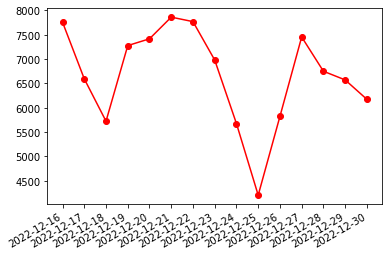

In [77]:
x,y = list(counter.keys()), list(counter.values())
x.reverse()
y.reverse()
plt.plot(x,y,'ro-')
plt.gcf().autofmt_xdate()
plt.show()

## Sample some tweets to expore its features

In [ ]:
ids = sample(list(tweets_dict.keys()),3)

print(f"samples:{ids}")

for id in ids:
  tweet = tweets_dict[id]
  print(\
        'id\t',tweet.id,'\n',\
        'username\t',tweet.username,'\n',\
        'usr_description\t',tweet.user.description,'\n',\
        'label\t',tweet.user.label,'\n',\
        'followersCount\t',tweet.user.followersCount,'\n',\
        'friendsCount\t',tweet.user.friendsCount,'\n',\
        'statusesCount\t',tweet.user.statusesCount,'\n',\
        'favouritesCount\t',tweet.user.favouritesCount,'\n',\
        'location\t',tweet.user.location,'\n',\
        'replyCount\t',tweet.replyCount,'\n',\
        'retweetCount\t',tweet.retweetCount,'\n',\
        'likeCount\t',tweet.likeCount,'\n',\
        'quoteCount\t',tweet.quoteCount,'\n',\
        'coordinates\t',tweet.coordinates,'\n',\
        'country\t',(tweet.place.country if tweet.place else 'None'),'\n',\
        'countryCode\t',(tweet.place.countryCode if tweet.place else 'None'),'\n',\
        'hashtags\t',tweet.hashtags,'\n',\
        'cashtags\t',tweet.cashtags,'\n',\
        'viewCount\t',tweet.viewCount,'\n'
        )

## Num of users post tweets vs Num of tweets about chatGPT of each usr

only a few users post more than 100 tweets about chatGPT(during...)

<ipython-input-72-9b1332fca414>:3: DeprecatedFeatureWarning: username is deprecated, use user.username instead
  usr.append(tweet.username)


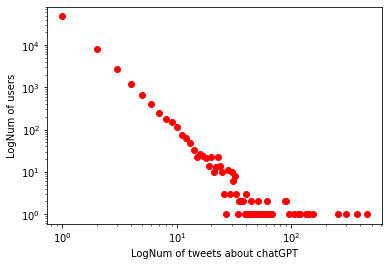

In [72]:
usr = []
for tid,tweet in tweets_dict.items():
  usr.append(tweet.username)
usr_counter = Counter(usr)
ccounter = Counter(usr_counter.values())

# visualize
x,y = list(ccounter.keys()), list(ccounter.values())
plt.loglog(x,y,'ro')
# plt.plot(x,y,'ro')
plt.xlabel('LogNum of tweets about chatGPT')
plt.ylabel('LogNum of users')
plt.show()

## Num of followers of users who talk about chatGPT vs their followerCount

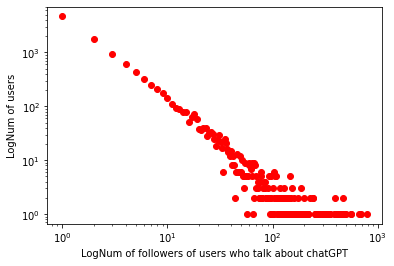

In [75]:
followers = []
for tid,tweet in tweets_dict.items():
  followers.append(tweet.user.followersCount)
fcounter = Counter(followers)
ccounter = Counter(fcounter.values())
x,y = list(ccounter.keys()), list(ccounter.values())
plt.loglog(x,y,'ro')
plt.xlabel('LogNum of followers of users who talk about chatGPT')
plt.ylabel('LogNum of users')
plt.show()